# Lab 02

This work will cover the usage of convolution and correlation in signal processing and in statistics.

## 1. Convolution and correlation

From the point of view of signal processing convolution and correlation are very similar operations. They are defined as following

Convolution:
$$ (f*g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y-x)dx$$
Cross-correlation:
$$ (f\star g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y+x)dx$$

If `g(x)` is symmetric then the convolution and cross-correlation are the same.

Let's create a numpy array with square-shaped signal.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

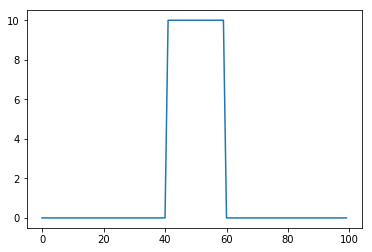

In [7]:
N = 100 # sample count
startX = 40  
endX = 60

x = np.arange(N)
x = ((x < endX) * (x > startX)) * 10
_ = plt.plot(x)

Let's create a triangular signal.

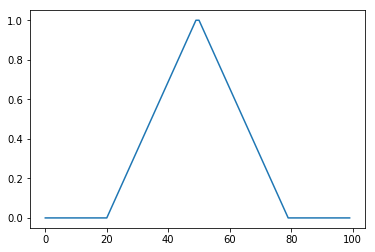

In [8]:
y = np.zeros(100)
heightY = 1
startY = 20
endY = 80
widthY = (endY - startY) / 2.

slope = (heightY / widthY)

y[startY:N / 2] = (np.linspace(startY, N / 2, N / 2 - startY) - startY) * slope
y[N / 2:endY] = 2 * heightY - (np.linspace(N / 2, endY, endY - N / 2) - startY) * slope
    
_ = plt.plot(y)

Now let's apply two operations on the inputs and compare results.

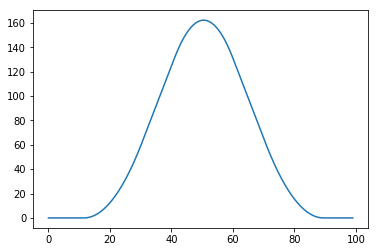

In [9]:
from scipy.signal import convolve

x_conv = convolve(x, y, 'same')
_ = plt.plot(x_conv)

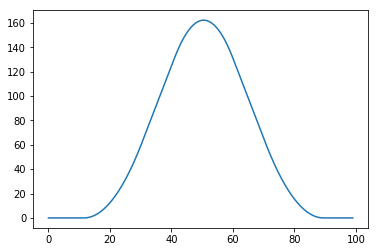

In [10]:
from scipy.signal import correlate

x_corr = correlate(x, y, 'same')
_ = plt.plot(x_corr)

As you see, the result of convolution for symmetric kernel is the same as result of correlation.

### Exercise 1
Try these two operations with the non-symetric kernel.

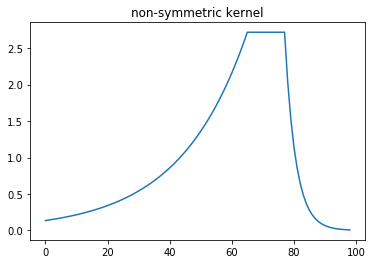

In [11]:
z = np.exp(np.concatenate([np.linspace(-2, 1, 6 * N / 9), np.linspace(1, 1, N / 9), np.linspace(1, -5, 2 * N / 9)]))

plt.title('non-symmetric kernel')
_ = plt.plot(z)

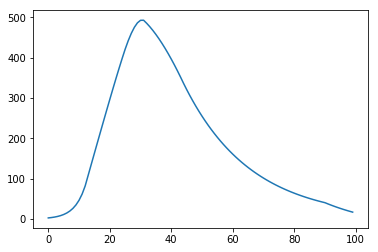

In [12]:
x_corr_nonsym = correlate(x, z, 'same')
_ = plt.plot(x_corr_nonsym)

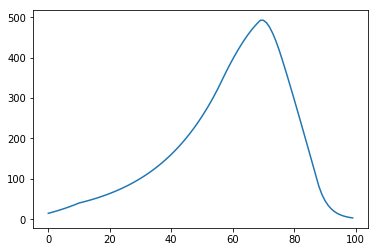

In [13]:
x_conv_nonsym = convolve(x, z, 'same')
_ = plt.plot(x_conv_nonsym)

## 2. Convolution of distributions
In statistics convolution plays important role.

The distribution of the *sum of two independent variables* is the convolution of the distributions.

I.e. if we consider two independent continuous random variables `X` and `Y` with PDFs `f` and `g` the PDF of their sum (X+Y) will be computed as: 

$$ d(x) = (f * g)(x) $$

We can get an interesting result if we consider the sum of several random variables with identical distributions, i.e. convolution of a distribution with itself several times.
2
For example, let's take a uniform distribution.

In [14]:
%%capture

orig = np.random.uniform(0, 10, 1200)
h = plt.hist(orig, bins=120, normed=True)
orig = h[0]
t = h[1]
xconv = np.copy(orig)

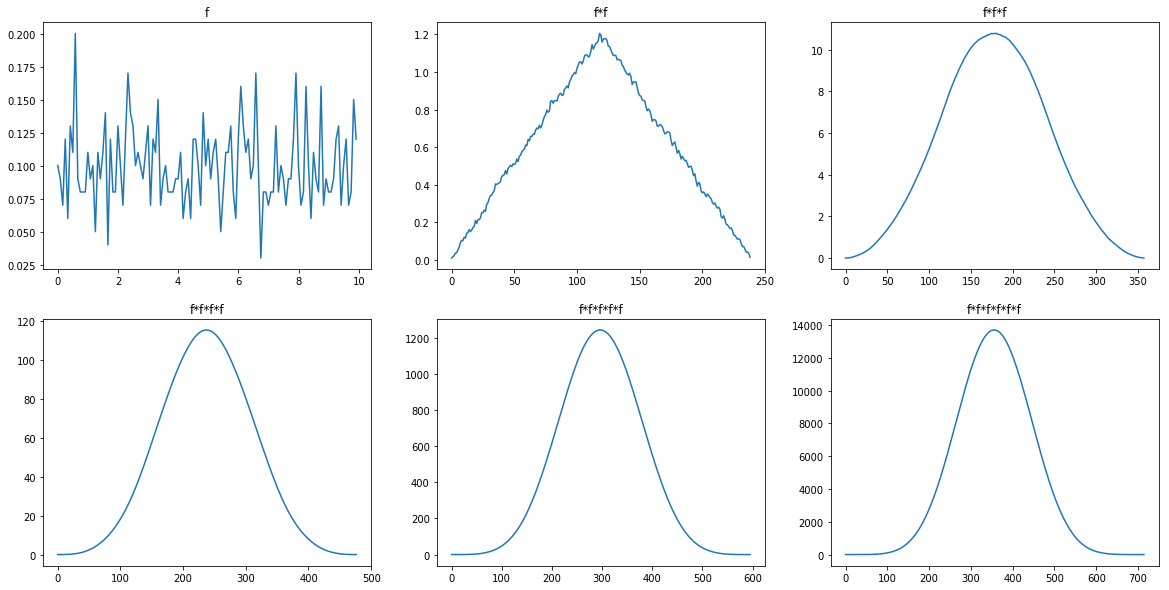

In [15]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2, 3, 1)
ax.set_title("f")
ax.plot(t[:-1], orig)

for i in range(5):
    xconv = convolve(orig, xconv)
    ax = plt.subplot(2, 3, i + 2)
    ax.set_title('*'.join('f' * (i+2)))
    ax.plot(xconv);

This is an illustration of Central Limit Theorem: the distribution of the sum of random variables which are iid (independent identically distributed) has a form of a Gaussian.

## 3. Correlation and covariance

In statistics the linear correlation between two variables X and Y can be measured using Pearson correlation coefficient:

$$ corr(x,y) = \frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt {\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}}$$

In [16]:
import pandas as pd

data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".", index_col=0)
data.fillna(data.mean(), inplace=True)
data.corr()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.049590,-0.084175,0.357641
VIQ,0.946639,1.000000,0.778135,-0.071988,-0.069610,0.337478
PIQ,0.934125,0.778135,1.000000,0.002461,-0.075462,0.386817
Weight,-0.049590,-0.071988,0.002461,1.000000,0.690199,0.501977
Height,-0.084175,-0.069610,-0.075462,0.690199,1.000000,0.601308
MRI_Count,0.357641,0.337478,0.386817,0.501977,0.601308,1.000000


The unnormalized version of the correlation coefficient is the measure of joint variability - **covariance**.
$$ cov(x,y) = \frac{1}{n-1}\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) $$

In [17]:
data.cov()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,579.946154,538.376923,505.501282,-27.310391,-7.993097,6.225462e+05
VIQ,538.376923,557.720513,412.939744,-38.878543,-6.482117,5.760814e+05
PIQ,505.501282,412.939744,504.948077,1.264507,-6.686325,6.282894e+05
Weight,-27.310391,-38.878543,1.264507,522.971660,62.237382,8.297610e+05
Height,-7.993097,-6.482117,-6.686325,62.237382,15.548060,1.713821e+05
MRI_Count,622546.153846,576081.435897,628289.384615,829761.016194,171382.098817,5.224695e+09


As you can see, the correlation and covariance always have the same sign which shows the tendency in the linear relationship between variables.

Let's now consider more closely the correlation between `Height` and `Weight` of the people from experiments.

In [18]:
import scipy

scipy.stats.pearsonr(data['Height'], data['Weight'])[0]

0.69019868434268938

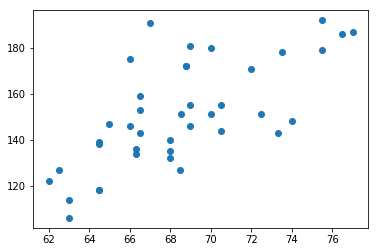

In [19]:
_ = plt.scatter(data['Height'], data['Weight'])

### Exercise 2

Let's compare the difference in the definition of **correlation** from the signal processing point of view and from the point of view of statistics.

1. Compute the correlation from `scipy.signal` package of demeaned signals. Divide by the number of observations - 1.
2. Compute the covariance using `numpy` or any other package. Compare results

In [20]:
# compute demeaned correlation divided by n-1 using scipy.signal
from scipy.signal import correlate

def covariance_scipy(x, y):
    x, y = map(np.asarray, (x, y))
    assert x.shape[0] == y.shape[0]
    n = x.shape[0]
    return correlate(x - x.mean(), y - y.mean(), mode='valid').sum() / (n - 1)

covariance_scipy(data.Weight, data.Height)

62.237381916329284

In [21]:
# compute covariance using numpy
def covariance_numpy(x, y):
    return np.cov(x, y)[0, 1]

covariance_numpy(data.Weight, data.Height)

62.237381916329277

In [22]:
print "scipy, same value:", np.isclose(covariance_scipy(data.Weight, data.Height),
                                       data.cov()['Weight']['Height'])
print "numpy, same value:", np.isclose(covariance_numpy(data.Weight, data.Height),
                                       data.cov()['Weight']['Height'])

scipy, same value: True
numpy, same value: True


In [23]:
%timeit covariance_scipy(data.Weight.values, data.Height.values)

The slowest run took 5.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 84 µs per loop


In [24]:
%timeit covariance_numpy(data.Weight.values, data.Height.values)

The slowest run took 4.14 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 83.1 µs per loop


### Exercise 3

1. Implement the computation of Pearson correlation coefficient. 
1. Implement calculation of **t-statistics**, and **p-value** for the correlation coefficient. Add p-value to return value of the function.
1. Compare results with `scipy` implementation for `Height` and `Weight`.

In [25]:
from scipy.stats import t, pearsonr, ttest_ind

In [26]:
def pearsonr_custom(x, y):
    # Preprocessing
    x, y = map(np.asarray, (x, y))
    # 1. Pearson correlation coefficient
    xm = x - x.mean()
    ym = y - y.mean()
    pearson_corr = (xm * ym).sum() / np.sqrt(np.square(xm).sum() * np.square(ym).sum())
    # 2. t-statistics and p-value
    assert x.shape[0] == y.shape[0]
    n = x.shape[0]
    t_stat_square = (pearson_corr ** 2) * (n - 2.) / (1. - pearson_corr ** 2)
    p_value = 2 * t.sf(np.sqrt(t_stat_square), n - 2.)

    return pearson_corr, p_value

In [27]:
pearson_scipy = pearsonr(data.Weight, data.Height)
pearson_custom = pearsonr_custom(data.Weight, data.Height)

np.isclose(pearson_scipy, pearson_custom)

array([ True,  True], dtype=bool)

In [28]:
%timeit pearsonr_custom(data.Weight.values, data.Height.values)

1000 loops, best of 3: 184 µs per loop


In [29]:
%timeit pearsonr(data.Weight.values, data.Height.values)

10000 loops, best of 3: 82.4 µs per loop


In [30]:
%lprun pearsonr_custom(data.Weight.values, data.Height.values)

ERROR:root:Line magic function `%lprun` not found.
